# IO.
## Práctica 2, Parte 1 -> Política óptima para circuitos

Importaciones

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Nuestras clases
from racetrack_env import RaceTrackEnv
from mc_agent import MonteCarloAgent
from racetrack_utils import train_agent, create_animation, show_track_layouts

%matplotlib inline

Creamos los mapas con los que haremos las pruebas.


In [16]:
# Circuito 1: La "L" (Izquierda)
TRACK_LEFT = [
    "#################",
    "############FFFFF",
    "############FFFFF",
    "############FFFFF",
    "############FFFFF",
    "############FFFFF",
    "############FFFFF",
    "######......FFFFF",
    "######......FFFFF",
    "#####.......#####",
    "####........#####",
    "####........#####",
    "###.........#####",
    "###.........#####",
    "###.........#####",
    "###.........#####",
    "###.........#####",
    "###.........#####",
    "###.........#####",
    "###.........#####",
    "###.........#####",
    "###.........#####",
    "###.........#####",
    "###.........#####",
    "####........#####",
    "####........#####",
    "####........#####",
    "####........#####",
    "#####.......#####",
    "#####.......#####",
    "#####.......#####",
    "#####SSSSSSS#####",
    "#################"
]

# Circuito 2: La "S" (Derecha) - ¡NUEVO!
TRACK_RIGHT = [
    "################################",
    "#########################FFFFFFF",
    "#########################FFFFFFF",
    "#########################FFFFFFF",
    "#########################FFFFFFF",
    "#########################FFFFFFF",
    "#########################FFFFFFF",
    "#################........FFFFFFF",
    "#################........FFFFFFF",
    "##################.......FFFFFFF",
    "##################.......#######",
    "###################......#######",
    "###################......#######",
    "###################......#######",
    "####################.....#######",
    "####################.....#######",
    "####################.....#######",
    "####################.....#######",
    "###################......#######",
    "###################......#######",
    "##################.......#######",
    "##################.......#######",
    "#################........#######",
    "#################........#######",
    "################.........#######",
    "################.........#######",
    "###############..........#######",
    "###############..........#######",
    "##############...........#######",
    "##############...........#######",
    "#############............#######",
    "#############............#######",
    "############.............#######",
    "############.............#######",
    "###########..............#######",
    "###########..............#######",
    "##########...............#######",
    "########.................#######",
    "########.................#######",
    "#######..................#######",
    "#######..................#######",
    "#######..................#######",
    "#######..................#######",
    "#######SSSSS.............#######",
    "#######SSSSS.............#######",
    "#######SSSSS.............#######",
    "################################",
]

In [2]:
# Circuito 1: La "L" (Izquierda)
TRACK_LEFT = [
    "##################",
    "####.............F",
    "###..............F",
    "###..............F",
    "##...............F",
    "#................F",
    "#................F",
    "#..........#######",
    "#.........########",
    "#.........########",
    "#.........########",
    "#.........########",
    "#.........########",
    "#.........########",
    "#.........########",
    "##........########",
    "##........########",
    "##........########",
    "##........########",
    "##........########",
    "##........########",
    "##........########",
    "##........########",
    "###.......########",
    "###.......########",
    "###.......########",
    "###.......########",
    "###.......########",
    "###.......########",
    "###.......########",
    "####......########",
    "####......########",
    "####SSSSSS########"
]

# Circuito 2: La "S" (Derecha) - ¡NUEVO!
TRACK_RIGHT = [
    "################################",
    "#########################FFFFFFF",
    "#########################FFFFFFF",
    "#########################FFFFFFF",
    "#########################FFFFFFF",
    "#########################FFFFFFF",
    "#########################FFFFFFF",
    "#################........FFFFFFF",
    "#################........FFFFFFF",
    "##################.......FFFFFFF",
    "##################.......#######",
    "###################......#######",
    "###################......#######",
    "###################......#######",
    "####################.....#######",
    "####################.....#######",
    "####################.....#######",
    "####################.....#######",
    "###################......#######",
    "###################......#######",
    "##################.......#######",
    "##################.......#######",
    "#################........#######",
    "#################........#######",
    "################.........#######",
    "################.........#######",
    "###############..........#######",
    "###############..........#######",
    "##############...........#######",
    "##############...........#######",
    "#############............#######",
    "#############............#######",
    "############.............#######",
    "############.............#######",
    "###########..............#######",
    "###########..............#######",
    "##########...............#######",
    "########.................#######",
    "########.................#######",
    "#######..................#######",
    "#######..................#######",
    "#######..................#######",
    "#######..................#######",
    "#######SSSSS.............#######",
    "#######SSSSS.............#######",
    "#######SSSSS.............#######",
    "################################",
]

Comprobamos la forma del mapa mediante una visualización más sencilla para nuestros ojos

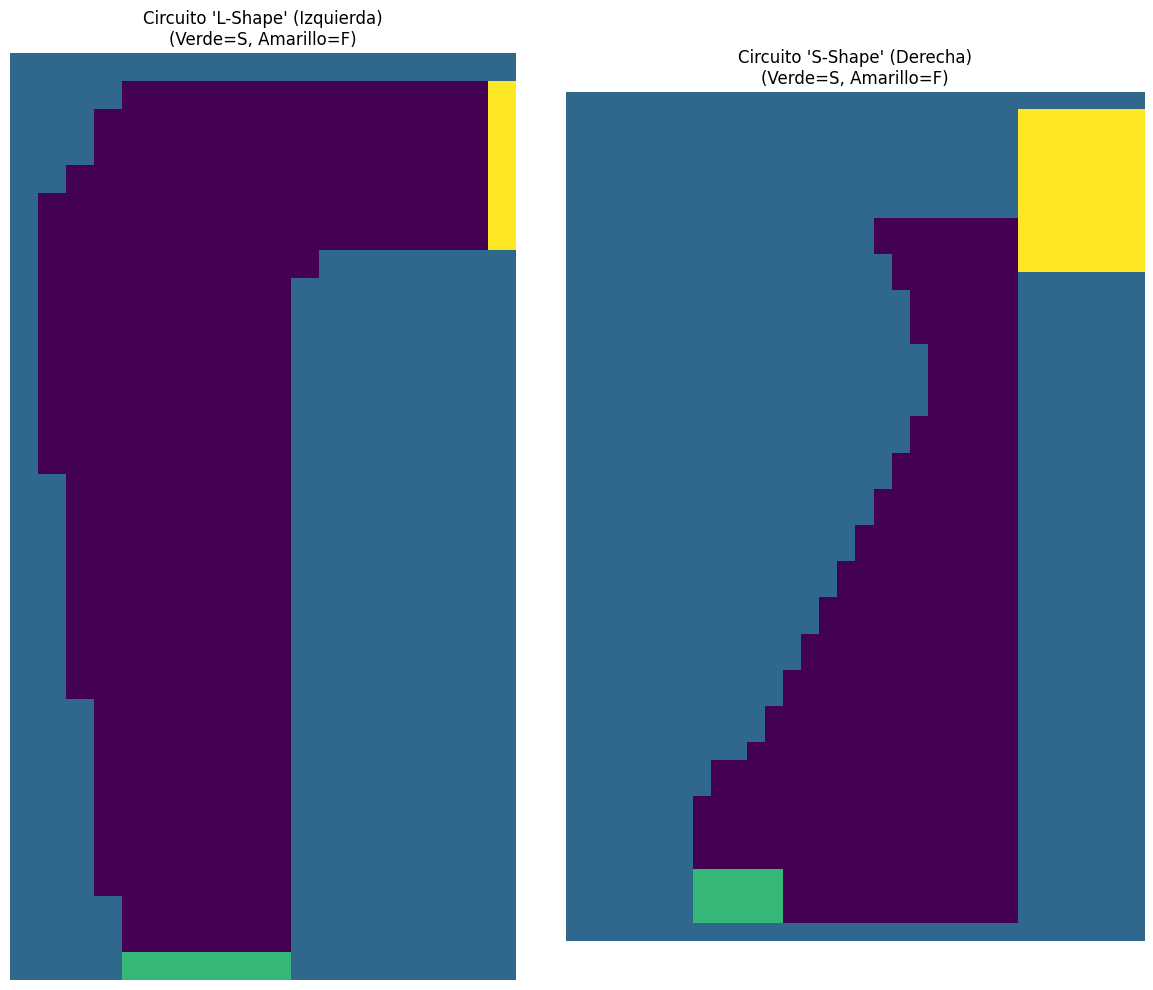

In [3]:
# --- CREACIÓN Y VERIFICACIÓN ---

# Creamos los objetos (igual que antes)
env_left = RaceTrackEnv(TRACK_LEFT)
env_right = RaceTrackEnv(TRACK_RIGHT)

# Inicializamos agentes (opcional hacerlo aquí, pero necesario para entrenar)
agent_left = MonteCarloAgent(env_left)
agent_right = MonteCarloAgent(env_right)

# ¡MAGIA! Visualizamos todos de una vez

show_track_layouts(
    [env_left, env_right], 
    ["Circuito 'L-Shape' (Izquierda)", "Circuito 'S-Shape' (Derecha)"]
)

Creamos los objetos de entorno y agente.

- ENTORNO (racetrack_env.py): Simula la física de un coche con inercia en una cuadrícula discreta. Implementa las reglas establecidas con posición, velocidad, inicio, meta, choques y reinicios entre otras configuraciones.
- AGENTE (mc_agent.py): Implementa un algoritmo de control Monte Carlo. No conoce el mapa, solo aprende a base de prueba y error (episodios completos) actualizando la tabla Q de 5 dimensiones que estima el valor de cada aceleración en cada estado (posición + velocidad).


Entrenamiento:

- Se ejecutarán 10.000 episodios donde el agente interactúa con el entorno. Se utiliza una política e-greedy con decaimiento (explora mucho  al principio, poco al final) para garantizar la cvonvergencia a una ruta óptima.

Visualización:

- Vamos a generar dos gifs para ver la evolución de cómo aprende hasta completar el primer episodio, y luego otrro gif qwue resume los siguientes episodios de 500 en 500, así viendo una evolución global del entrenamiento.

In [4]:
# Configuración
EPISODIOS = 10000

# --- EXPERIMENTO 1: PISTA IZQUIERDA ---
env_left = RaceTrackEnv(TRACK_LEFT)
agent_left = MonteCarloAgent(env_left)

# 1. Entrenar
historia_left = train_agent(env_left, agent_left, num_episodes=EPISODIOS)

# 2. Generar GIFs
# Ep 1 (Novato)
create_animation(env_left, [h for h in historia_left if h['episode']==1], 
                 "track_left_novato.gif", title_prefix="L-TRACK NOVATO -")
# Evolución
create_animation(env_left, [h for h in historia_left if h['episode']>1], 
                 "track_left_pro.gif", title_prefix="L-TRACK PRO -")


# --- EXPERIMENTO 2: PISTA DERECHA ---
env_right = RaceTrackEnv(TRACK_RIGHT)
agent_right = MonteCarloAgent(env_right)

historia_right = train_agent(env_right, agent_right, num_episodes=EPISODIOS)

create_animation(env_right, [h for h in historia_right if h['episode']==1], 
                 "track_right_novato.gif", title_prefix="R-TRACK NOVATO -")

create_animation(env_right, [h for h in historia_right if h['episode']>1], 
                 "track_right_pro.gif", title_prefix="R-TRACK PRO -")

--- Iniciando entrenamiento en mapa 18x33 (10000 eps) ---
   > Progreso: 10% | Tiempo: 7s
   > Progreso: 20% | Tiempo: 8s
   > Progreso: 30% | Tiempo: 9s
   > Progreso: 40% | Tiempo: 10s
   > Progreso: 50% | Tiempo: 11s
   > Progreso: 60% | Tiempo: 12s
   > Progreso: 70% | Tiempo: 13s
   > Progreso: 80% | Tiempo: 14s
   > Progreso: 90% | Tiempo: 15s
   > Progreso: 100% | Tiempo: 17s
--- Entrenamiento finalizado en 17.4s ---

Generando GIF 'track_left_novato.gif'...
✅ GIF guardado: track_left_novato.gif
Generando GIF 'track_left_pro.gif'...
✅ GIF guardado: track_left_pro.gif
--- Iniciando entrenamiento en mapa 32x47 (10000 eps) ---
   > Progreso: 10% | Tiempo: 4s
   > Progreso: 20% | Tiempo: 5s
   > Progreso: 30% | Tiempo: 6s
   > Progreso: 40% | Tiempo: 7s
   > Progreso: 50% | Tiempo: 8s
   > Progreso: 60% | Tiempo: 9s
   > Progreso: 70% | Tiempo: 9s
   > Progreso: 80% | Tiempo: 10s
   > Progreso: 90% | Tiempo: 11s
   > Progreso: 100% | Tiempo: 11s
--- Entrenamiento finalizado en 11.2s